<a href="https://colab.research.google.com/github/diptomondal007/Advanced-Android-Rat-Client/blob/master/house_rent_prediction_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [9]:
data_frame = pd.read_csv("RentRaw.csv")
data_frame.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,BuiltUpSize,City,CreatedDateTime,CreatedUser,DataSourceID,Furnishing,Latitude,Longitude,NoOfBathroom,NoOfBedroom,NoOfParking,Postcode,PostedDate,PropertyAddress,PropertyName,PropertyType,RentalPerMth,SourceUrl,State,UpdatedDateTime,UpdatedUser
0,1,1000,Bandar Utama,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.14195,101.616,2,3,1,47400,2018-07-30 00:00:00,Jalan Masjid,Pelangi Utama,Condominium,2200,https://www.iproperty.com.my/property/bandar-u...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
1,2,1000,Bandar Utama,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.14195,101.616,2,3,1,47400,2018-07-30 00:00:00,Jalan Masjid,Pelangi Utama,Condominium,2200,https://www.iproperty.com.my/property/bandar-u...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
2,3,1057,Petaling Jaya,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.12252,101.628,2,3,1,47300,2018-07-30 00:00:00,Jalan SS 2/72,Ken Damansara 3,Condominium,1980,https://www.iproperty.com.my/property/petaling...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
3,4,1057,Petaling Jaya,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.12252,101.628,2,3,1,47300,2018-07-30 00:00:00,Jalan SS 2/72,Ken Damansara 3,Condominium,1980,https://www.iproperty.com.my/property/petaling...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
4,5,0,Bandar Sunway,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.05930,101.616,2,2,0,47100,2018-07-30 00:00:00,Jalan Taylors,D' Latour,Condominium,2600,https://www.iproperty.com.my/property/bandar-s...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r


In [11]:
data_frame = data_frame.dropna()

In [13]:
data_frame = data_frame.reset_index(drop=True)

In [16]:
data_frame.isnull().sum()

ID                 0
BuiltUpSize        0
City               0
CreatedDateTime    0
CreatedUser        0
DataSourceID       0
Furnishing         0
Latitude           0
Longitude          0
NoOfBathroom       0
NoOfBedroom        0
NoOfParking        0
Postcode           0
PostedDate         0
PropertyAddress    0
PropertyName       0
PropertyType       0
RentalPerMth       0
SourceUrl          0
State              0
UpdatedDateTime    0
UpdatedUser        0
dtype: int64

In [18]:
data_frame = data_frame.drop_duplicates()
data_frame = data_frame.reset_index(drop=True)

In [21]:
data_frame = data_frame[["BuiltUpSize", "NoOfBathroom", "NoOfBedroom", "NoOfParking", "State", "Furnishing", "PropertyType", "RentalPerMth"]]
data_frame.head()

,BuiltUpSize,NoOfBathroom,NoOfBedroom,NoOfParking,State,Furnishing,PropertyType,RentalPerMth
0,1000,2,3,1,Selangor,Fully Furnished,Condominium,2200
1,1000,2,3,1,Selangor,Fully Furnished,Condominium,2200
2,1057,2,3,1,Selangor,Fully Furnished,Condominium,1980
3,1057,2,3,1,Selangor,Fully Furnished,Condominium,1980
4,0,2,2,0,Selangor,Fully Furnished,Condominium,2600


In [23]:
data_frame["State"].value_counts()

selangor        30201
kuala-lumpur    13644
johor           10205
putrajaya         256
Selangor           34
Name: State, dtype: int64

In [24]:
data_frame["State"] = data_frame["State"].replace("Selangor", "selangor")

In [26]:
data_frame["Furnishing"].value_counts()

Fully Furnished     30486
Partly Furnished    18305
Unfurnished          5460
Unknown                89
Name: Furnishing, dtype: int64

In [28]:
data_frame = data_frame[data_frame["Furnishing"] != "Unknown"].reset_index(drop=True)

In [30]:
data_frame = data_frame[data_frame["BuiltUpSize"] != 0].reset_index(drop=True)

data_frame = data_frame[data_frame["NoOfBedroom"] != 0].reset_index(drop=True)

data_frame = data_frame[data_frame["NoOfBathroom"] != 0].reset_index(drop=True)

data_frame = data_frame[data_frame["NoOfParking"] != 0].reset_index(drop=True)

data_frame = data_frame[data_frame["RentalPerMth"] != 0].reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


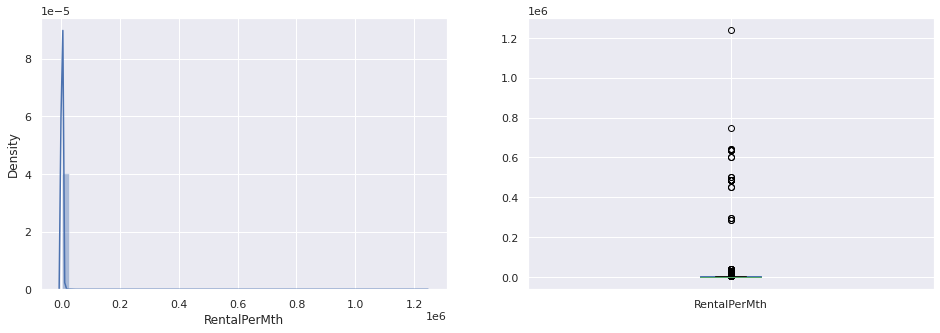

In [35]:
plt.subplot(121)
sns.distplot(data_frame["RentalPerMth"]);

plt.subplot(122)
data_frame["RentalPerMth"].plot.box(figsize=(16,5))

plt.show()

In [36]:
data_frame = data_frame[data_frame["RentalPerMth"] <= 10000].reset_index(drop=True)

In [37]:
with pd.option_context('float_format', '{:f}'.format): print(data_frame["RentalPerMth"].describe())

count   24426.000000
mean     2101.786211
std      1077.809424
min       110.000000
25%      1400.000000
50%      1800.000000
75%      2500.000000
max     10000.000000
Name: RentalPerMth, dtype: float64


In [39]:
data_frame_with_dummy = pd.get_dummies(data_frame)
data_frame_with_dummy.head()

,BuiltUpSize,NoOfBathroom,NoOfBedroom,NoOfParking,RentalPerMth,State_johor,State_kuala-lumpur,State_putrajaya,State_selangor,Furnishing_Fully Furnished,Furnishing_Partly Furnished,Furnishing_Unfurnished,PropertyType_1-sty Terrace/Link House,PropertyType_1.5-sty Terrace/Link House,PropertyType_2-sty Terrace/Link House,PropertyType_2.5-sty Terrace/Link House,PropertyType_3-sty Terrace/Link House,PropertyType_4-sty Terrace/Link House,PropertyType_Apartment,PropertyType_Bungalow,PropertyType_Cluster House,PropertyType_Condominium,PropertyType_Flat,PropertyType_Residential Land,PropertyType_Semi-detached House,PropertyType_Serviced Residence,PropertyType_Townhouse
0,1000,2,3,1,2200,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1000,2,3,1,2200,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1057,2,3,1,1980,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1057,2,3,1,1980,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1488,3,3,3,4500,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [48]:
X = data_frame_with_dummy.drop(columns=["RentalPerMth"])
Y = data_frame_with_dummy["RentalPerMth"]

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

In [106]:
y_test

6996     2800
6337     3500
1799     2200
20613    1800
2931     1250
         ... 
9257     1200
5398     2600
13884    1180
18403    1900
13069    1500
Name: RentalPerMth, Length: 8061, dtype: int64

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [108]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [110]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
128/128 [==============================] - 1s 4ms/step - loss: 4783342.1589 - val_loss: 1212896.8750
Epoch 2/400
128/128 [==============================] - 0s 2ms/step - loss: 1198776.7539 - val_loss: 1206587.7500
Epoch 3/400
128/128 [==============================] - 0s 2ms/step - loss: 1204613.5911 - val_loss: 1203864.8750
Epoch 4/400
128/128 [==============================] - 0s 2ms/step - loss: 1186487.6352 - val_loss: 1202743.8750
Epoch 5/400
128/128 [==============================] - 0s 2ms/step - loss: 1164902.6899 - val_loss: 1205369.7500
Epoch 6/400
128/128 [==============================] - 0s 2ms/step - loss: 1252822.5310 - val_loss: 1237727.5000
Epoch 7/400
128/128 [==============================] - 0s 2ms/step - loss: 1201620.7083 - val_loss: 1193253.0000
Epoch 8/400
128/128 [==============================] - 0s 4ms/step - loss: 1193126.6521 - val_loss: 1189622.0000
Epoch 9/400
128/128 [==============================] - 0s 2ms/step - loss: 1213131.9448 - val_lo

In [111]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 19)                513       
_________________________________________________________________
dense_41 (Dense)             (None, 19)                380       
_________________________________________________________________
dense_42 (Dense)             (None, 19)                380       
_________________________________________________________________
dense_43 (Dense)             (None, 19)                380       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 20        
Total params: 1,673
Trainable params: 1,673
Non-trainable params: 0
_________________________________________________________________


In [112]:
y_pred = model.predict(X_test)

MAE: 446.18126223883223
MSE: 449730.47546398215
RMSE: 670.6194714321842
VarScore: 0.6057758648097856


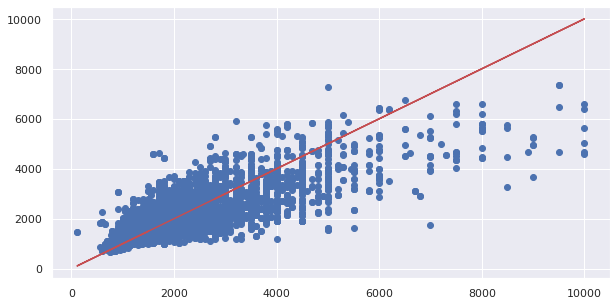

In [113]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [125]:
y = np.array(y_test)
y_p = np.array(y_pred).flatten()
df = pd.DataFrame({"test": y, "predictions": y_p})
df.head(100)

,test,predictions
0,2800,2372.852783
1,3500,2418.374756
2,2200,1511.511841
3,1800,2511.427979
4,1250,1084.376343
...,...,...
95,3300,2904.365479
96,4300,3264.951904
97,1400,2207.456787
98,1700,1859.645508
